In [1]:
import pandas as pd

In [2]:
import numpy as np
import seaborn as sns

In [3]:
from scipy import stats

In [4]:
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
import warnings

In [6]:
warnings.filterwarnings('ignore')

In [7]:
data=pd.read_csv('datasets_228_482_diabetes.csv')

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [9]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


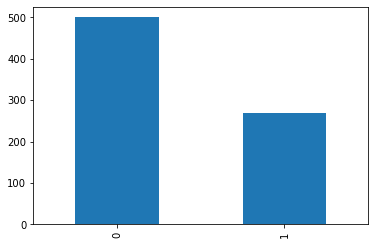

In [10]:
data['Outcome'].value_counts().plot(kind='bar')

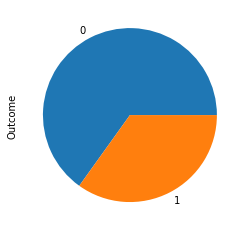

In [11]:
data['Outcome'].value_counts().plot(kind='pie')

In [12]:
data.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

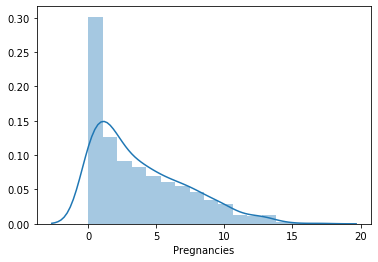

In [13]:
sns.distplot(data['Pregnancies'])

In [14]:
len(data[data['Pregnancies']==0])

111

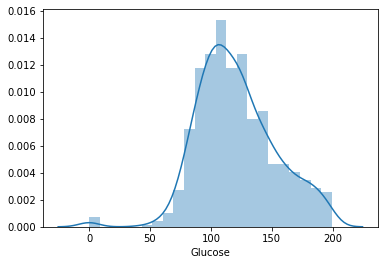

In [15]:
sns.distplot(data['Glucose'])

In [16]:
len(data[data['Glucose']==0])

5

In [17]:
data['Glucose'].replace({0:np.NAN},inplace=True)

In [18]:
data[data['Glucose'].isna()]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
75,1,NaN,48,20,0,24.7,0.140,22,0
182,1,NaN,74,20,23,27.7,0.299,21,0
342,1,NaN,68,35,0,32.0,0.389,22,0
349,5,NaN,80,32,0,41.0,0.346,37,1
502,6,NaN,68,41,0,39.0,0.727,41,1


In [19]:
data.groupby(['Outcome'])['Glucose'].median()

Outcome
0    107.0
1    140.0
Name: Glucose, dtype: float64

In [20]:
data.loc[(data['Outcome'] == 0 ) & (data['Glucose'].isnull()), 'Glucose'] =107

In [21]:
data.loc[(data['Outcome'] == 1 ) & (data['Glucose'].isnull()), 'Glucose'] =140

In [22]:
def cal_median(x):
    median=data.groupby(['Outcome'])[x].median()
    return median
    

In [23]:
def fillNa(x,value1,value2):
    data.loc[(data['Outcome'] == 0 ) & (data[x].isnull()), x] =value1
    data.loc[(data['Outcome'] == 1 ) & (data[x].isnull()), x] =value2

In [24]:
def noOfZero(x):
    print(len(data[data[x]==0]))
    print("Replacing 0 with Nan Values")
    data[x].replace({0:np.NAN},inplace=True)
    print(data[data[x].isna()])

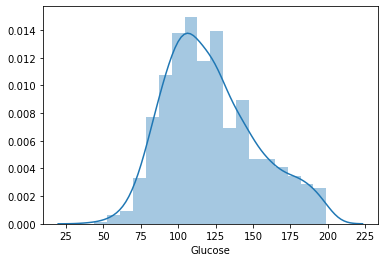

In [25]:
sns.distplot(data['Glucose'])

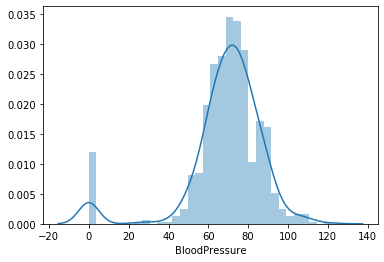

In [26]:
sns.distplot(data['BloodPressure'])

In [27]:
noOfZero('BloodPressure')

35
Replacing 0 with Nan Values
     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
7             10    115.0            NaN              0        0  35.3   
15             7    100.0            NaN              0        0  30.0   
49             7    105.0            NaN              0        0   0.0   
60             2     84.0            NaN              0        0   0.0   
78             0    131.0            NaN              0        0  43.2   
81             2     74.0            NaN              0        0   0.0   
172            2     87.0            NaN             23        0  28.9   
193           11    135.0            NaN              0        0  52.3   
222            7    119.0            NaN              0        0  25.2   
261            3    141.0            NaN              0        0  30.0   
266            0    138.0            NaN              0        0  36.3   
269            2    146.0            NaN              0        0  27.5   
300    

In [28]:
cal_median('BloodPressure')

Outcome
0    70.0
1    74.5
Name: BloodPressure, dtype: float64

In [29]:
fillNa('BloodPressure',70,74.5)

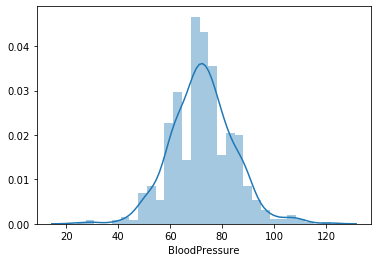

In [30]:
sns.distplot(data['BloodPressure'])

In [31]:
data.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

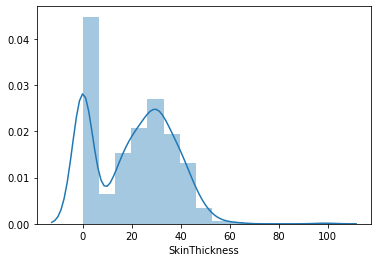

In [32]:
sns.distplot(data['SkinThickness'])

In [33]:
noOfZero('SkinThickness')

227
Replacing 0 with Nan Values
     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
2              8    183.0           64.0            NaN        0  23.3   
5              5    116.0           74.0            NaN        0  25.6   
7             10    115.0           70.0            NaN        0  35.3   
9              8    125.0           96.0            NaN        0   0.0   
10             4    110.0           92.0            NaN        0  37.6   
..           ...      ...            ...            ...      ...   ...   
757            0    123.0           72.0            NaN        0  36.3   
758            1    106.0           76.0            NaN        0  37.5   
759            6    190.0           92.0            NaN        0  35.5   
762            9     89.0           62.0            NaN        0  22.5   
766            1    126.0           60.0            NaN        0  30.1   

     DiabetesPedigreeFunction  Age  Outcome  
2                       0.672   3

In [34]:
cal_median('SkinThickness')

Outcome
0    27.0
1    32.0
Name: SkinThickness, dtype: float64

In [35]:
fillNa('SkinThickness',27,32)

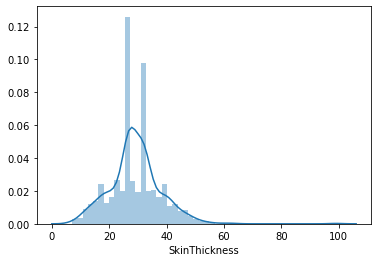

In [36]:
sns.distplot(data['SkinThickness'])

In [114]:
data.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

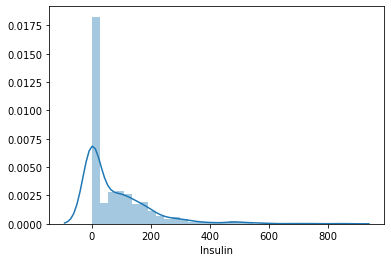

In [37]:
sns.distplot(data['Insulin'])

In [38]:
noOfZero('Insulin')

374
Replacing 0 with Nan Values
     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6    148.0           72.0           35.0      NaN  33.6   
1              1     85.0           66.0           29.0      NaN  26.6   
2              8    183.0           64.0           32.0      NaN  23.3   
5              5    116.0           74.0           27.0      NaN  25.6   
7             10    115.0           70.0           27.0      NaN  35.3   
..           ...      ...            ...            ...      ...   ...   
761            9    170.0           74.0           31.0      NaN  44.0   
762            9     89.0           62.0           27.0      NaN  22.5   
764            2    122.0           70.0           27.0      NaN  36.8   
766            1    126.0           60.0           32.0      NaN  30.1   
767            1     93.0           70.0           31.0      NaN  30.4   

     DiabetesPedigreeFunction  Age  Outcome  
0                       0.627   5

In [39]:
cal_median('Insulin')

Outcome
0    102.5
1    169.5
Name: Insulin, dtype: float64

In [40]:
fillNa('Insulin',102.5,169.5)

In [41]:
data.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

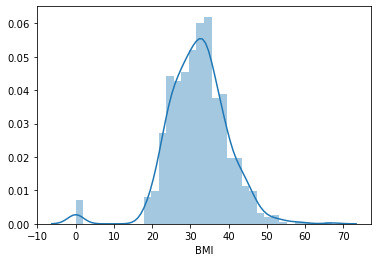

In [42]:
sns.distplot(data['BMI'])

In [43]:
cal_median('BMI')

Outcome
0    30.05
1    34.25
Name: BMI, dtype: float64

In [44]:
noOfZero('BMI')

11
Replacing 0 with Nan Values
     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin  BMI  \
9              8    125.0           96.0           32.0    169.5  NaN   
49             7    105.0           70.0           27.0    102.5  NaN   
60             2     84.0           70.0           27.0    102.5  NaN   
81             2     74.0           70.0           27.0    102.5  NaN   
145            0    102.0           75.0           23.0    102.5  NaN   
371            0    118.0           64.0           23.0     89.0  NaN   
426            0     94.0           70.0           27.0    102.5  NaN   
494            3     80.0           70.0           27.0    102.5  NaN   
522            6    114.0           70.0           27.0    102.5  NaN   
684            5    136.0           82.0           27.0    102.5  NaN   
706           10    115.0           74.5           32.0    169.5  NaN   

     DiabetesPedigreeFunction  Age  Outcome  
9                       0.232   54        1  


In [45]:
fillNa('BMI',30.1,34.3)

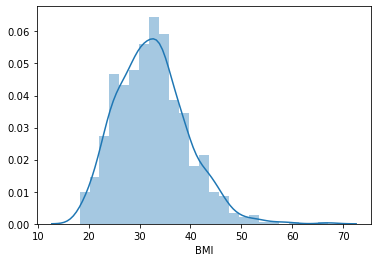

In [46]:
sns.distplot(data['BMI'])

In [171]:
data.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

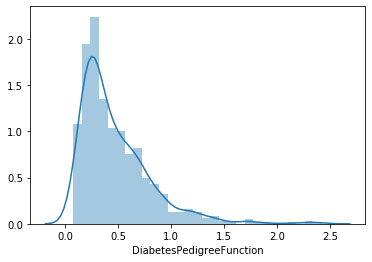

In [47]:
sns.distplot(data['DiabetesPedigreeFunction'])

In [48]:
noOfZero('DiabetesPedigreeFunction')

0
Replacing 0 with Nan Values
Empty DataFrame
Columns: [Pregnancies, Glucose, BloodPressure, SkinThickness, Insulin, BMI, DiabetesPedigreeFunction, Age, Outcome]
Index: []


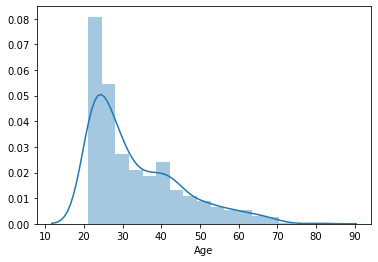

In [49]:
sns.distplot(data['Age'])

In [175]:
noOfZero('Age')

0
Replacing 0 with Nan Values
Empty DataFrame
Columns: [Pregnancies, Glucose, BloodPressure, SkinThickness, Insulin, BMI, DiabetesPedigreeFunction, Age, Outcome]
Index: []


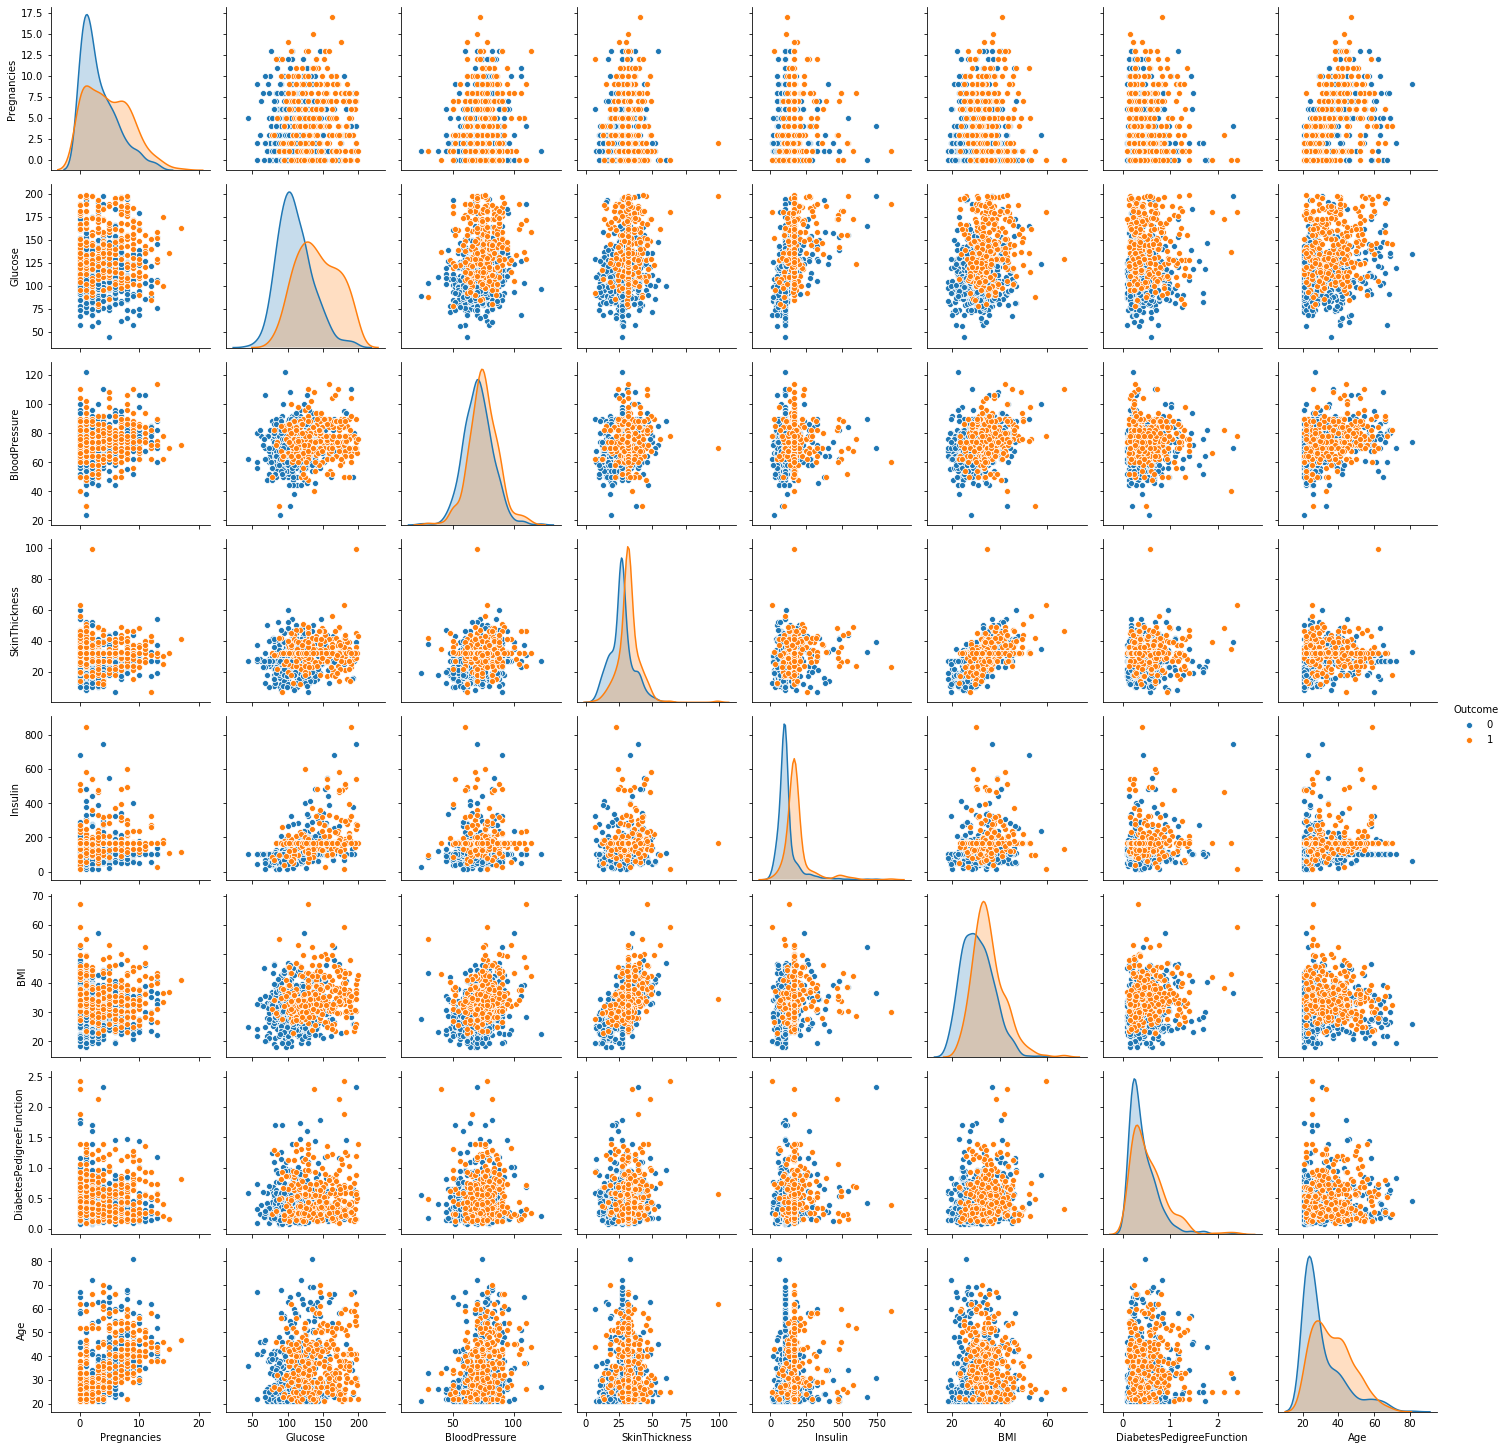

In [176]:
sns.pairplot(data,diag_kind='kde',hue='Outcome')

In [50]:
def boxplot(x):
    return sns.boxplot(x)

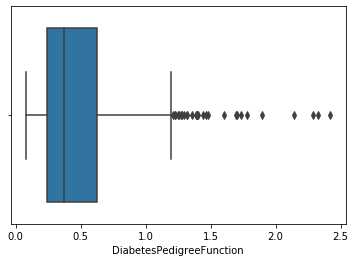

In [51]:
boxplot(data['DiabetesPedigreeFunction'])

In [65]:
lw=0
uw=0
def boxvalues(x):
    x.sort_values()
    Q1,Q3=np.percentile(x,[25,75])
    print("Q1 is {} and Q3 is {}".format(Q1,Q3))
    IQR=Q3-Q1
    LW=Q1 - 1.5*IQR
    UW=Q3 + 1.5*IQR
    lw=LW
    uw=UW
    print("IQR is {}".format(IQR))
    print("Lower whisker is {} and Upper whisker is {}".format(LW,UW))
   

In [66]:
boxvalues(data['DiabetesPedigreeFunction'])

Q1 is 0.24375 and Q3 is 0.62625
IQR is 0.38249999999999995
Lower whisker is -0.32999999999999996 and Upper whisker is 1.2


In [69]:
def outlier(x):
    outlier_len=len(data[((data[x] < lw) |(data[x] > uw))])
    print("No of Outliers is {} ".format(outlier_len))


In [74]:
def log_transform(x):
    return np.log(x)

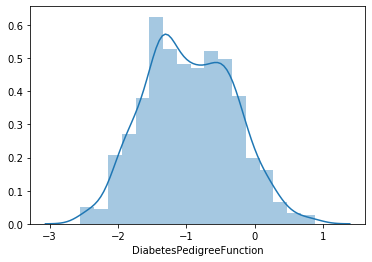

In [76]:
sns.distplot(np.log(data['DiabetesPedigreeFunction']))

In [77]:
data['DiabetesPedigreeFunction']=np.log(data['DiabetesPedigreeFunction'])

In [78]:
data['Age']=np.log(data['Age'])

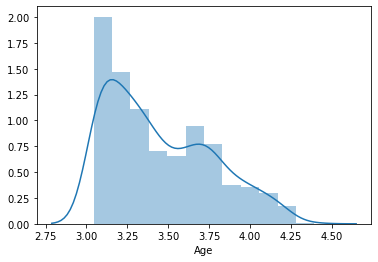

In [79]:
sns.distplot(data['Age'])

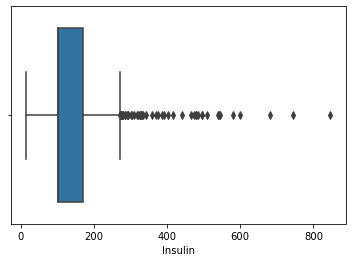

In [80]:
boxplot(data['Insulin'])

In [82]:
data['Insulin']=log_transform(data['Insulin'])

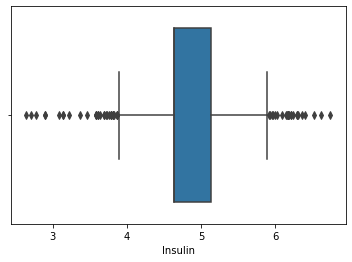

In [83]:
boxplot(data['Insulin'])

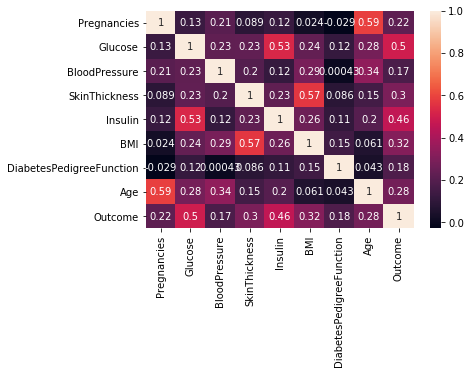

In [85]:
sns.heatmap(data.corr(),annot=True)

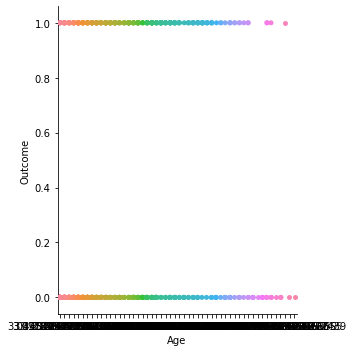

In [100]:
sns.catplot(x="Age", y="Outcome", data=data)


In [89]:
X=data.drop(columns={'Outcome'})

In [90]:
y=data['Outcome']

In [86]:
from sklearn.preprocessing import StandardScaler

In [87]:
scaler=StandardScaler()

In [92]:
X_std=scaler.fit_transform(X)

In [101]:
from sklearn.model_selection import train_test_split

In [102]:
X_train, X_test, y_train, y_test = train_test_split(X_std, y, test_size=0.3, random_state=99)

In [103]:
from sklearn.ensemble import RandomForestClassifier

In [104]:
rfc=RandomForestClassifier(n_estimators=200,max_depth=14)

In [105]:
rfc.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=14, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [106]:
train_pred=rfc.predict(X_train)

In [107]:
test_pred=rfc.predict(X_test)

In [108]:
from sklearn.metrics import classification_report,confusion_matrix

In [109]:
print(classification_report(y_train,train_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       345
           1       1.00      1.00      1.00       192

    accuracy                           1.00       537
   macro avg       1.00      1.00      1.00       537
weighted avg       1.00      1.00      1.00       537



In [111]:
print(confusion_matrix(y_train,train_pred))

[[345   0]
 [  0 192]]


In [112]:
data['Outcome'].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

In [114]:
print(classification_report(y_test,test_pred))

              precision    recall  f1-score   support

           0       0.93      0.92      0.92       155
           1       0.83      0.86      0.84        76

    accuracy                           0.90       231
   macro avg       0.88      0.89      0.88       231
weighted avg       0.90      0.90      0.90       231



In [115]:
print(confusion_matrix(y_test,test_pred))

[[142  13]
 [ 11  65]]


In [116]:
from sklearn.neighbors import KNeighborsClassifier

In [121]:
knn=KNeighborsClassifier(n_neighbors=10)

In [122]:
knn.fit(X_train,y_train)

train_pred1=knn.predict(X_train)

test_pred1=knn.predict(X_test)


In [123]:
print(classification_report(y_train,train_pred1))
print(confusion_matrix(y_train,train_pred1))

              precision    recall  f1-score   support

           0       0.84      0.91      0.88       345
           1       0.82      0.69      0.75       192

    accuracy                           0.83       537
   macro avg       0.83      0.80      0.81       537
weighted avg       0.83      0.83      0.83       537

[[315  30]
 [ 59 133]]


In [124]:

print(classification_report(y_test,test_pred1))

print(confusion_matrix(y_test,test_pred1))

              precision    recall  f1-score   support

           0       0.86      0.88      0.87       155
           1       0.75      0.71      0.73        76

    accuracy                           0.83       231
   macro avg       0.81      0.80      0.80       231
weighted avg       0.82      0.83      0.83       231

[[137  18]
 [ 22  54]]


In [132]:
classification_report(y_test,test_pred1)

'p'

In [141]:
test_prob=rfc.predict_proba(X_test)

In [135]:
import scikitplot as skplt


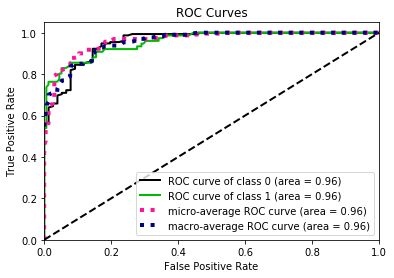

In [142]:
skplt.metrics.plot_roc_curve(y_test,test_prob)
plt.show()


In [134]:
pip install scikit-plot